**STAGE 1: TOTAL EMISSIONS RANKINGS**  

The analysis identifies food products with the highest and the lowest green house gas (GHG) emissions. In the further step, results will be visualised in bar plot with explanations.

In [77]:
#Importing necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Importing dataset
food = pd.read_csv('clean.csv')
food.head(10)


,food_product,land_use_change,animal_feed,farm,processing,transport,packaging,retail,total_emissions
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6


In [78]:
#Finding the top ten food products with the highest emissions
highest_emitters = food.sort_values(by = 'total_emissions', ascending = False).head(10)
print(highest_emitters)

         food_product  land_use_change  animal_feed  farm  processing  \
33   Beef (beef herd)             16.3          1.9  39.4         1.3   
35      Lamb & Mutton              0.5          2.4  19.5         1.1   
39             Cheese              4.5          2.3  13.1         0.7   
32     Dark Chocolate             14.3          0.0   3.7         0.2   
34  Beef (dairy herd)              0.9          2.5  15.7         1.1   
31             Coffee              3.7          0.0  10.4         0.6   
42   Shrimps (farmed)              0.2          2.5   8.4         0.0   
16           Palm Oil              3.1          0.0   2.1         1.3   
19          Olive Oil             -0.4          0.0   4.3         0.7   
15        Soybean Oil              3.1          0.0   1.5         0.3   

    transport  packaging  retail  total_emissions  
33        0.3        0.2     0.2             57.7  
35        0.5        0.3     0.2             22.1  
39        0.1        0.2     0.3        

In [79]:
#Finding the top ten food products with the lowest emissions
lowest_emitters = food.sort_values(by = 'total_emissions', ascending = True).head(10)
print(lowest_emitters)

        food_product  land_use_change  animal_feed  farm  processing  \
11              Nuts             -2.1          0.0   2.1         0.0   
21    Onions & Leeks              0.0          0.0   0.2         0.0   
25      Citrus Fruit             -0.1          0.0   0.3         0.0   
22   Root Vegetables              0.0          0.0   0.2         0.0   
5           Potatoes              0.0          0.0   0.2         0.0   
27            Apples              0.0          0.0   0.2         0.0   
23         Brassicas              0.0          0.0   0.3         0.0   
24  Other Vegetables              0.0          0.0   0.2         0.1   
30       Other Fruit              0.1          0.0   0.4         0.0   
10              Peas              0.0          0.0   0.7         0.0   

    transport  packaging  retail  total_emissions  
11        0.1        0.1     0.0              0.2  
21        0.1        0.0     0.0              0.3  
25        0.1        0.0     0.0              0.3  

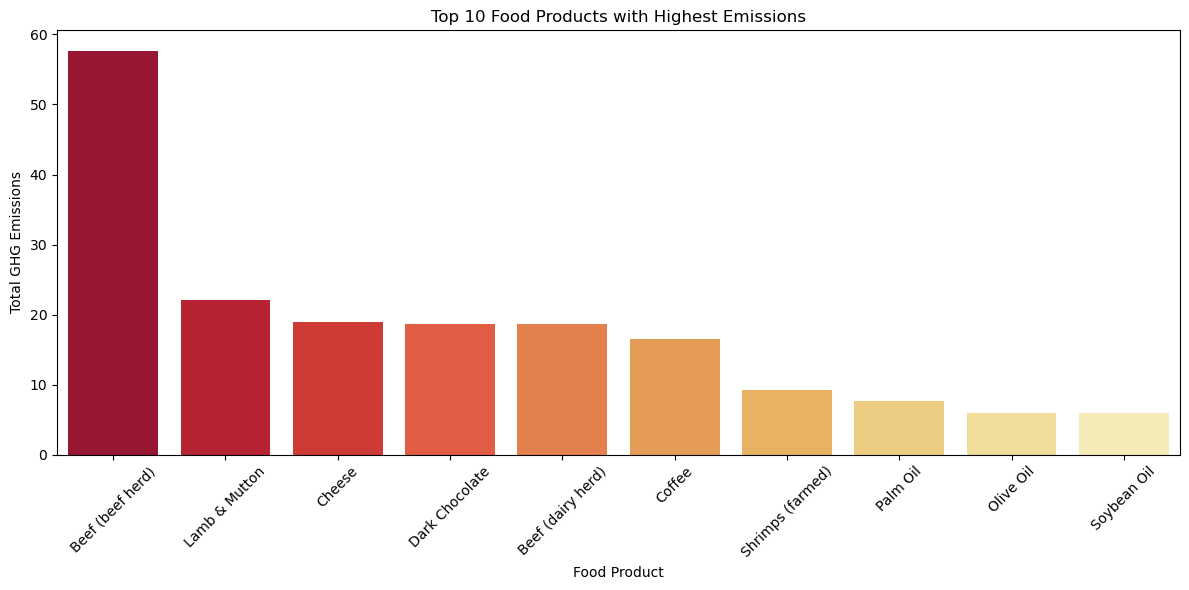

In [80]:
#Visualising the top ten highest emitters
plt.figure(figsize = (12,6))
sns.barplot(data = highest_emitters, x = highest_emitters['food_product'], y = highest_emitters['total_emissions'], hue = 'food_product', legend = False, palette = 'YlOrRd_r')
plt.title('Top 10 Food Products with Highest Emissions')
plt.xlabel('Food Product')
plt.ylabel('Total GHG Emissions')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

The rankings is heavily dominated by Beef and Lamb, with significant contributions from Dairy (Cheese) and high impact crops like Dark Chocolate. The 

Meanwhile, most of the lowest emitters are vegetables, plants and nuts.

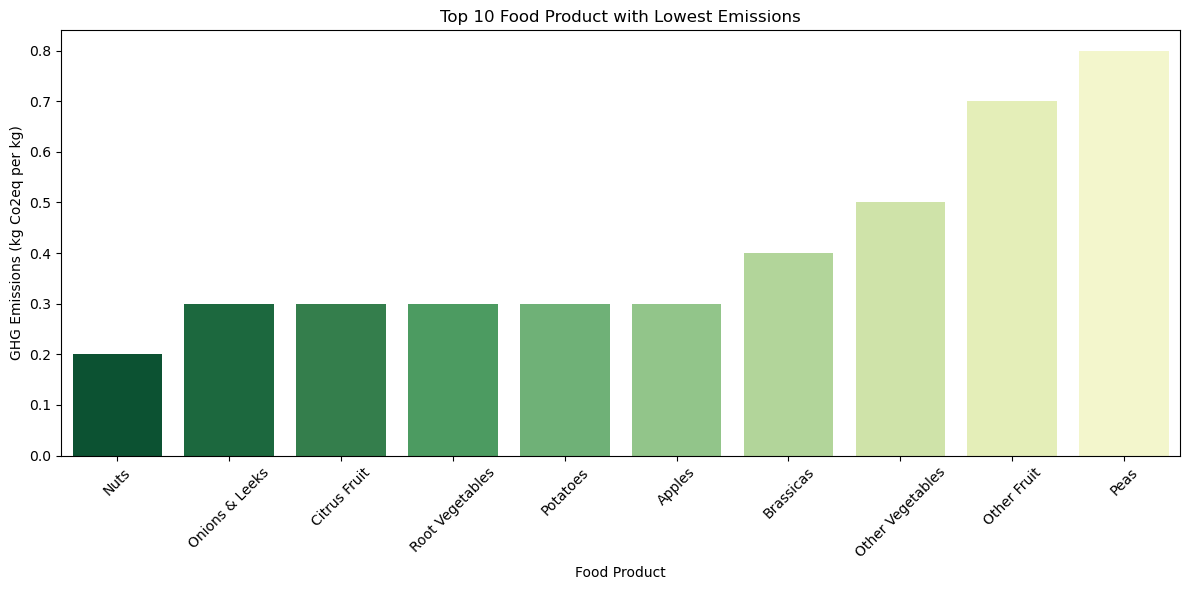

In [ ]:
#Visualizing the top ten lowest emitters
plt.figure(figsize = (12,6))
sns.barplot(data = lowest_emitters, x = 'food_product', y = 'total_emissions', hue = 'food_product', legend = False, palette = 'YlGn_r')
plt.title('Top 10 Food Product with Lowest Emissions')
plt.xlabel('Food Product')
plt.ylabel('GHG Emissions (kg Co2eq per kg)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


**STAGE 2: Agro-chain structural analysis**  
Drawing from the previous results, most of the lowest emitters are vegetables, but some plant-based products still contribute large amount of GHG emissions, such as dark chocolate, seed oils and coffee. So, it is important to delve into different factors which contribute to the total emissions of each product. This analysis aims to fulfill these tasks:  
- Provide a breakdown of all stages of agri-food supply chain.
- Identify the most and least dominant drivers.
- Define upstream emissions (land use, animal feed and farm) and downstream emissions (processing, transport, packaging and retail)
- Calculate the ratio between downstream and upstream emissions to identify which phase plays a relatively larger role.

farm               149.2
land_use_change     54.2
animal_feed         19.5
packaging           11.6
processing          10.9
transport            8.4
retail               3.0
dtype: float64


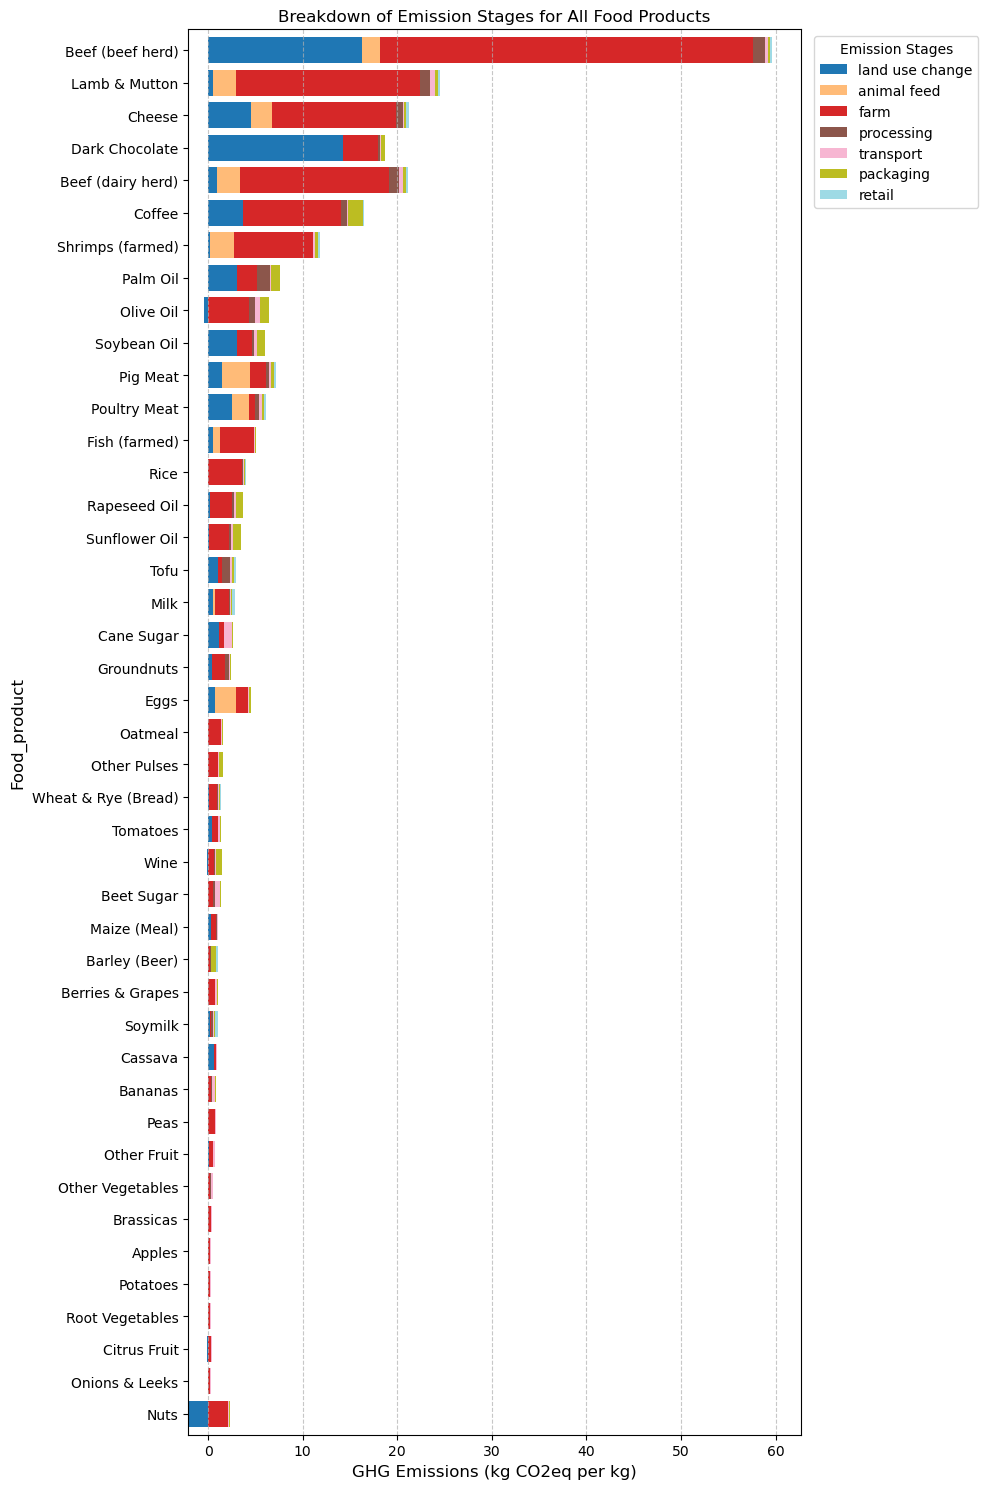

In [82]:
#Finding the most impactful emission stage
stage_cols = ['land_use_change', 'animal_feed', 'farm', 'processing', 'transport', 'packaging', 'retail']
emission_stage_totals = food[stage_cols].sum().sort_values(ascending = False)
print(emission_stage_totals)
#Visualising emission stages of each food product with stacked bar chart
sorted_food = food.sort_values(by = 'total_emissions', ascending = True) #sorting food products by total emissions from highest to lowest
food = sorted_food.reset_index(drop = True) #resetting index after sorting
ax = sorted_food.set_index('food_product')[stage_cols].plot(
    kind = 'barh',
    stacked = True,
    figsize = (10,15),
    colormap = 'tab20',
    width = 0.8
)
plt.title('Breakdown of Emission Stages for All Food Products')
plt.ylabel('Food_product', fontsize = 12)
plt.xlabel('GHG Emissions (kg CO2eq per kg)', fontsize = 12)
#plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
labels = ['land use change', 'animal feed', 'farm', 'processing', 'transport', 'packaging', 'retail']
plt.legend(
    labels,
    title = 'Emission Stages',
    bbox_to_anchor = (1.01, 1),
    loc = 'upper left',
    fontsize = 10,
    ncol = 1
)
plt.tight_layout()
plt.show()


As observed, Retail contributes the least GHG emissions with only 3kg CO2-e. Farming has the highest emissions with around 150kg CO2-e, yet the distribution of the factors can be different in each food product. Alongside farming practices, changing land use also contributes a significant emissions, especially livestock, oil, sugar, coffee and chocolate.  

Notably, while changing land usage of other food product releases more GHG emissions, planting nuts reduces the emissions. This suggests that buyers could change their diet by consuming more healthy fat from nuts and authorities should develop advanced farm techiques to minimise carbon footprint during farming phase. 


**Stage 3: Agri-chain correlation analysis**  

In this stage, the analysis focuses on the interconnection between different stages of the supply chain to answer these following questions:  
- Which pair of stages have the most significant correlation and why?
- Is there a correlation between upstream stages and downstream stages?

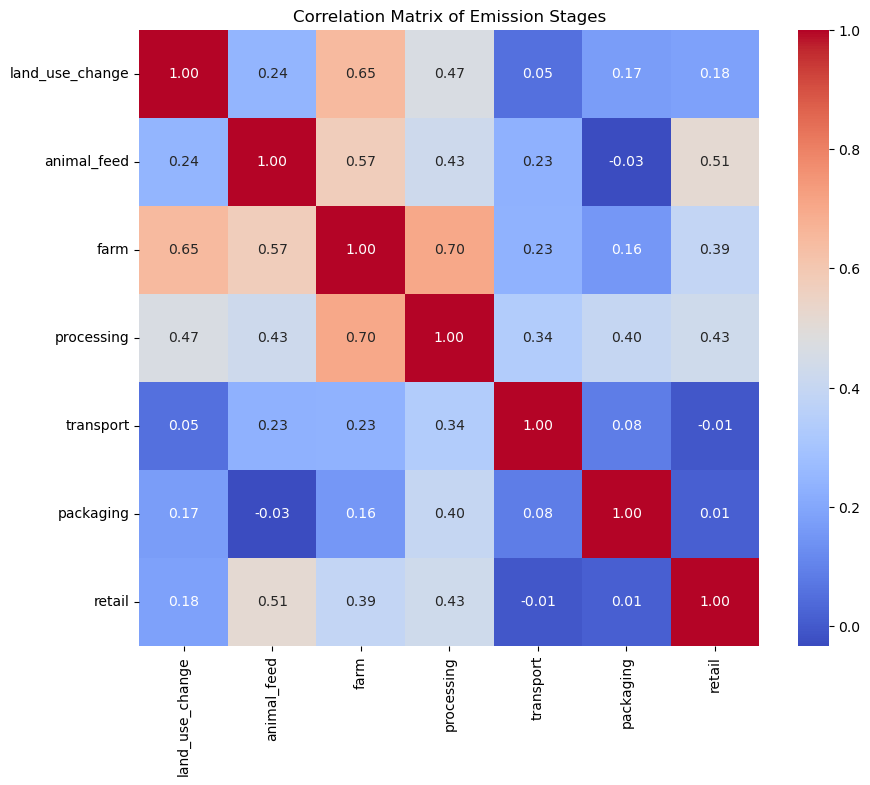

In [83]:
#Correlation analysis between different emission stages
correlation_matrix = food[stage_cols].corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Emission Stages')
plt.show()

The correlation analysis reveals some key insights:  

  #Insight 1: Transport and Retail actually have a marginal relationship with the total footprint. This confirms the "Food Miles Myth" and proves that store operation is not the primary driver of carbon emissions. Instead, how the food product were grown on the farm matters more.  

  #Insight 2: Farming and Processing stages have the most significant positive correlation of 0.70. Since the outputs of farming are the inputs of the processing phase, the post-harvest procedure should be adaptive to the increasing quantity of raw materials. This correlation can be explained by the infrastructure and energy required to handle large volume of raw inputs.  

  #Insight 3: Land use and animal feed have a moderate relationship and this suggests that the carbon footprint from feeding animals in linked to the deforestation and land conversion to plant feed crops like soy or maize. 

In [84]:
#Compare emissions between upstream and downstream stages
upstream_cols = ['land_use_change', 'animal_feed', 'farm']
downstream_cols = ['processing', 'transport', 'packaging', 'retail']
#Calculating upstream and downstream emissions
food['upstream_emissions'] = food[upstream_cols].sum(axis = 1)
food['downstream_emissions'] = food[downstream_cols].sum(axis = 1)
#Calculating the sum of upstream and downstream emissions
upstream_total = food['upstream_emissions'].sum()
downstream_total = food['downstream_emissions'].sum()
print(f"Total Upstream Emissions: {upstream_total}")
print(f"Total Downstream Emissions: {downstream_total}")
print(f"The ratio of upstream to downstream emissions is {upstream_total/downstream_total:.2f}")

Total Upstream Emissions: 222.9
Total Downstream Emissions: 33.900000000000006
The ratio of upstream to downstream emissions is 6.58


To assure the true environmental burden lies on the production phase and the proposed solution is placed effectively, the analysis examined the environmental impacts of upstream phase (Land use change, Animal feed and Farm) versus downstream phase (Processing, Transport, Packaging and Retail). The GHG emissions coming from the production stages are significantly higher than those from downstream stages, with the ratio of 6.58. This result confirms that "Food Miles" are not the biggest problem. Adversely, comparing the two phases shows that upstream activities contribute the vast majority of GHGs, here is more than 60% of the total. Agri-business and authorities should focus on regenerative farming, changing animal food source, stopping deforestation and controling food waste at the production level. 

In [85]:
#Statistical analysis - ANOVA test to see if there are significant differences in emissions between food categories
#Create a category map for food products
category_map = {
    'Wheat & Rye (Bread)': 'Grains & Beans', 'Maize (Meal)': 'Grains & Beans', 'Barley (Beer)': 'Beverages & Confectionery', 'Oatmeal':'Grains & Beans',
    'Rice':'Grains & Beans', 'Potatoes':'Fruits & Vegetables', 'Cassava':'Fruits & Vegetables', 'Cane Sugar': 'Oils, Sugars & Nuts', 'Beet Sugar': 'Oils, Sugars & Nuts',
    'Other Pulses': 'Grains & Beans', 'Peas': 'Grains & Beans', 'Nuts':'Grains & Beans', 'Groundnuts':'Grains & Beans', 'Soymilk': 'Grains & Beans', 'Tofu': 'Grains & Beans', 
    'Soybean Oil': 'Oils, Sugars & Nuts', 'Olive Oil': 'Oils, Sugars & Nuts', 'Sunflower Oil': 'Oils, Sugars & Nuts', 'Rapeseed Oil': 'Oils, Sugars & Nuts', 'Palm Oil': 'Oils, Sugars & Nuts',
    'Tomatoes': 'Fruits & Vegetables', 'Onions & Leeks': 'Fruits & Vegetables', 'Root Vegetables': 'Fruits & Vegetables', 'Brassicas': 'Fruits & Vegetables', 'Other Vegetables': 'Fruits & Vegetables',
    'Citrus Fruit': 'Fruits & Vegetables', 'Bananas': 'Fruits & Vegetables', 'Apples': 'Fruits & Vegetables', 'Berries & Grapes': 'Fruits & Vegetables', 'Other Fruit': 'Fruits & Vegetables',
    'Wine': 'Beverages & Confectionery', 'Coffee': 'Beverages & Confectionery', 'Dark Chocolate': 'Beverages & Confectionery', 'Beef (beef herd)': 'Meat & Seafood', 'Lamb & Mutton': 'Meat & Seafood', 
    'Beef (dairy herd)': 'Dairy & Eggs', 'Pig Meat': 'Meat & Seafood', 'Poultry Meat': 'Meat & Seafood', 'Eggs': 'Dairy & Eggs', 'Milk': 'Dairy & Eggs', 'Cheese': 'Dairy & Eggs', 'Fish (farmed)': 'Meat & Seafood',
    'Shrimps (farmed)': 'Meat & Seafood'
}
food['category'] = food['food_product'].map(category_map) #applying the category map to create a new column
print(food['category'].value_counts())

#Perform ANOVA test
categories = food['category'].dropna().unique()
#Create lists of emissions for each category
emission_groups = [food.loc[food['category'] == group,'total_emissions'] for group in categories]
#ANOVA test
f_stat, p_val = stats.f_oneway(emission_groups[0], emission_groups[1], emission_groups[2], emission_groups[3], emission_groups[4], emission_groups[5])
print(f"F-Statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")
if p_val < 0.05: 
    print("There are significant differences in emissions between food categories")
else:
    print("No significant differences in emissions between food categories")


category
Fruits & Vegetables          12
Grains & Beans               10
Oils, Sugars & Nuts           7
Meat & Seafood                6
Beverages & Confectionery     4
Dairy & Eggs                  4
Name: count, dtype: int64
F-Statistic: 3.6916
p-value: 0.0082
There are significant differences in emissions between food categories


In [86]:
#Showing category with the highest average emissions
category_means = food.groupby('category')['total_emissions'].mean().sort_values(ascending = False)
print(category_means)


category
Meat & Seafood               17.000000
Dairy & Eggs                 10.600000
Beverages & Confectionery     9.425000
Oils, Sugars & Nuts           4.400000
Grains & Beans                1.710000
Fruits & Vegetables           0.608333
Name: total_emissions, dtype: float64


Our analysis concludes that the differences in carbon footprint between food catgories are statistically significant with p-value at 0.0082. While correlation identifies the relationships between stages of agri-food supply chain, the ANOVA proves that these factors combine to make Meat and Seafood significantly more impactful than plant-based categories. It is also means that what we eat (the food category) or purchasing power is a more powerful lever for climate action than the miles these products travelling  and be stored (transport and retail).